## 将.xml文件转为.text格式文件，.text格式文件中，一行是一篇文章

In [1]:
from gensim.corpora import WikiCorpus

if __name__ == '__main__':

    print('主程序开始...')

    input_file_name = '/Users/admin/A_NLP/data/zhwiki-20190720-pages-articles-multistream.xml.bz2'
    output_file_name = 'wiki.cn.txt'
    print('开始读入wiki数据...')
    input_file = WikiCorpus(input_file_name, lemmatize=False, dictionary={})
    print('wiki数据读入完成！')
    output_file = open(output_file_name, 'w', encoding="utf-8")

    print('处理程序开始...')
    count = 0
    for text in input_file.get_texts():
        output_file.write(' '.join(text) + '\n')
        count = count + 1
        if count % 10000 == 0:
            print('目前已处理%d条数据' % count)
    print('处理程序结束！')

    output_file.close()
    print('主程序结束！')

主程序开始...
开始读入wiki数据...
wiki数据读入完成！
处理程序开始...
目前已处理10000条数据
目前已处理20000条数据
目前已处理30000条数据
目前已处理40000条数据
目前已处理50000条数据
目前已处理60000条数据
目前已处理70000条数据
目前已处理80000条数据
目前已处理90000条数据
目前已处理100000条数据
目前已处理110000条数据
目前已处理120000条数据
目前已处理130000条数据
目前已处理140000条数据
目前已处理150000条数据
目前已处理160000条数据
目前已处理170000条数据
目前已处理180000条数据
目前已处理190000条数据
目前已处理200000条数据
目前已处理210000条数据
目前已处理220000条数据
目前已处理230000条数据
目前已处理240000条数据
目前已处理250000条数据
目前已处理260000条数据
目前已处理270000条数据
目前已处理280000条数据
目前已处理290000条数据
目前已处理300000条数据
目前已处理310000条数据
目前已处理320000条数据
目前已处理330000条数据
目前已处理340000条数据
处理程序结束！
主程序结束！


## 打印转换后的第一行

In [13]:
ff = open('wiki.cn.txt')
for line in ff:
    print(line)
    break

歐幾里得 西元前三世紀的古希臘數學家 現在被認為是幾何之父 此畫為拉斐爾的作品 雅典學院 数学 是利用符号语言研究數量 结构 变化以及空间等概念的一門学科 从某种角度看屬於形式科學的一種 數學透過抽象化和邏輯推理的使用 由計數 計算 數學家們拓展這些概念 對數學基本概念的完善 早在古埃及 而在古希臘那裡有更為嚴謹的處理 從那時開始 數學的發展便持續不斷地小幅進展 世紀的文藝復興時期 致使數學的加速发展 直至今日 今日 數學使用在不同的領域中 包括科學 工程 醫學 經濟學和金融學等 有時亦會激起新的數學發現 並導致全新學科的發展 數學家也研究純數學 就是數學本身的实质性內容 而不以任何實際應用為目標 雖然許多研究以純數學開始 但其过程中也發現許多應用之处 詞源 西方语言中 數學 一詞源自於古希臘語的 其有 學習 學問 科學 數學研究 即使在其語源內 其形容詞 意思為 和學習有關的 用功的 亦會被用來指 數學的 其在英语中表面上的複數形式 及在法语中的表面複數形式 可溯至拉丁文的中性複數 由西塞罗譯自希臘文複數 此一希臘語被亚里士多德拿來指 萬物皆數 的概念 汉字表示的 數學 一詞大約产生于中国宋元時期 多指象數之學 但有時也含有今天上的數學意義 例如 秦九韶的 數學九章 永樂大典 數書九章 也被宋代周密所著的 癸辛雜識 記爲 數學大略 數學通軌 明代柯尚遷著 数学钥 清代杜知耕著 數學拾遺 清代丁取忠撰 直到 經過中國數學名詞審查委員會研究 算學 數學 兩詞的使用狀況後 確認以 數學 表示今天意義上的數學含義 历史 奇普 印加帝國時所使用的計數工具 玛雅数字 數學有着久遠的歷史 中國古代的六艺之一就有 數學一詞在西方有希腊语詞源 mathematikós 意思是 学问的基础 源于 máthema 科学 知识 学问 時間的長短等抽象的數量關係 比如时间单位有日 季節和年等 算術 加減乘除 也自然而然地產生了 歷史上曾有過許多不同的記數系統 在最初有歷史記錄的時候 為了解數字間的關係 為了測量土地 以及為了預測天文事件而形成的 结构 空间及时间方面的研究 到了 世纪 算术 微积分的概念也在此時形成 随着數學轉向形式化 從古至今 數學便一直不斷地延展 且與科學有豐富的相互作用 兩者的發展都受惠於彼此 在歷史上有著許多數學發現 並且直至今日都不斷地有新的發現 據mikhail

## 将语料库 按行进行，繁转简、清洗、分词

In [82]:
import re
import opencc
import jieba
cc = opencc.OpenCC('t2s')
fr = open('wiki.cn.txt','r')
fw = open('wiki.sen.txt','a+')
for line in fr:
    simple_format = cc.convert(line)# 繁转简
    zh_list = re.findall(u"[\u4e00-\u9fa5]+",simple_format)# 清洗掉非中文数据
    sentence = []
    for short_sentence in zh_list:
        sentence += list(jieba.cut(cc.convert(short_sentence)))
    fw.write(' '.join(sentence)+'\n')
fr.close()
fw.close()

## 为了后面的可视化效果，截取文件的前1万行做训练

In [9]:
f1 = open('wiki.sen.txt','r')
f2 = open('wiki.sen1k.txt','w')
i = 0
for line in f1:
    if i<1000:
        f2.write(line)
        i += 1
    else: break

## 打印出处理完的文件的前10行

In [84]:
ft = open('wiki.sen.txt','r')
i = 0
for line in ft:
    if i <10:
        print(line)
        print('\n'+'#############################################################'+'\n')
        i += 1

欧几里得 西元前 三 世纪 的 古希腊 数学家 现在 被 认为 是 几何 之 父 此画 为 拉斐尔 的 作品 雅典 学院 数学 是 利用 符号语言 研究 数量 结构 变化 以及 空间 等 概念 的 一门 学科 从 某种 角度看 属于 形式 科学 的 一种 数学 透过 抽象化 和 逻辑推理 的 使用 由 计数 计算 数学家 们 拓展 这些 概念 对 数学 基本概念 的 完善 早 在 古埃及 而 在 古希腊 那里 有 更为 严谨 的 处理 从 那时 开始 数学 的 发展 便 持续 不断 地 小幅 进展 世纪 的 文艺复兴 时期 致使 数学 的 加速 发展 直至 今日 今日 数学 使用 在 不同 的 领域 中 包括 科学 工程 医学 经济学 和 金融学 等 有时 亦 会 激起 新 的 数学 发现 并 导致 全新 学科 的 发展 数学家 也 研究 纯数学 就是 数学 本身 的 实质性 内容 而 不以 任何 实际 应用 为 目标 虽然 许多 研究 以 纯数学 开始 但 其 过程 中 也 发现 许多 应用 之 处 词源 西方 语言 中 数学 一 词源 自于 古希腊 语 的 其有 学习 学问 科学 数学 研究 即使 在 其 语源 内 其 形容词 意思 为 和 学习 有关 的 用功 的 亦 会 被 用来 指 数学 的 其 在 英语 中 表面 上 的 复数 形式 及 在 法语 中 的 表面 复数 形式 可溯 至 拉丁文 的 中性 复数 由 西塞罗 译自 希腊文 复数 此一 希腊语 被 亚里士多德 拿来 指 万物 皆 数 的 概念 汉字 表示 的 数学 一词 大约 产生 于 中国 宋元 时期 多指 象数 之学 但 有时 也 含有 今天 上 的 数学 意义 例如 秦九韶 的 数学 九章 永乐 大典 数书 九章 也 被 宋代 周密 所著 的 癸 辛杂识 记 为 数学 大略 数学 通轨 明代 柯尚 迁著 数学 钥 清代 杜知 耕著 数学 拾遗 清代 丁取忠 撰 直到 经过 中国 数学 名词 审查 委员会 研究 算学 数学 两词 的 使用 状况 后 确认 以 数学 表示 今天 意义 上 的 数学 含义 历史 奇普 印加帝国 时所 使用 的 计数 工具 玛雅 数字 数学 有着 久远 的 历史 中国 古代 的 六艺 之一 就 有 数学 一词 在 西方 有 希腊语 词源 意思 是 学问 的 基础 源

## 训练词向量

In [14]:
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [15]:
help(Word2Vec)

Help on class Word2Vec in module gensim.models.word2vec:

class Word2Vec(gensim.models.base_any2vec.BaseWordEmbeddingsModel)
 |  Train, use and evaluate neural networks described in https://code.google.com/p/word2vec/.
 |  
 |  Once you're finished training a model (=no more updates, only querying)
 |  store and use only the :class:`~gensim.models.keyedvectors.KeyedVectors` instance in `self.wv` to reduce memory.
 |  
 |  The model can be stored/loaded via its :meth:`~gensim.models.word2vec.Word2Vec.save` and
 |  :meth:`~gensim.models.word2vec.Word2Vec.load` methods.
 |  
 |  The trained word vectors can also be stored/loaded from a format compatible with the
 |  original word2vec implementation via `self.wv.save_word2vec_format`
 |  and :meth:`gensim.models.keyedvectors.KeyedVectors.load_word2vec_format`.
 |  
 |  Some important attributes are the following:
 |  
 |  Attributes
 |  ----------
 |  wv : :class:`~gensim.models.keyedvectors.Word2VecKeyedVectors`
 |      This object essent

In [10]:
print('主程序开始执行...')

input_file_name = 'wiki.sen1k.txt'
model_file_name = 'wiki_min_count500.model'

print('转换过程开始...')
model = Word2Vec(LineSentence(input_file_name),
                 size=100,  # 词向量长度
                 window=5,
                 min_count=500,
                 workers=multiprocessing.cpu_count())
print('转换过程结束！')

print('开始保存模型...')
model.save(model_file_name)
print('模型保存结束！')

print('主程序执行结束！')

主程序开始执行...
转换过程开始...
转换过程结束！
开始保存模型...
模型保存结束！
主程序执行结束！


## 测试几个词语，找出与其最相似的10个词语

In [8]:
from gensim.models import Word2Vec
 
wiki_model = Word2Vec.load('wiki_min_count500.model')
 
test = ['文学', '雨水', '汽车', '怪物', '几何','故宫']
for word in test:
    res = wiki_model.most_similar(word)
    print(word)    
    print(res)

文学
[('古典文学', 0.7968809008598328), ('文学史', 0.7745924592018127), ('诗歌', 0.7579449415206909), ('儿童文学', 0.7491970658302307), ('散文', 0.7447153329849243), ('哲学', 0.7366715669631958), ('当代', 0.7314921617507935), ('文学创作', 0.7222286462783813), ('文学作品', 0.7114439010620117), ('文坛', 0.7104883193969727)]
雨水
[('河水', 0.7941769361495972), ('海水', 0.774065375328064), ('地下水', 0.7640966176986694), ('泥沙', 0.7578056454658508), ('湖水', 0.7335045337677002), ('水流', 0.7184827327728271), ('水量', 0.7073623538017273), ('污水', 0.7046871185302734), ('泥土', 0.6986046433448792), ('水分', 0.6980623006820679)]
汽车
[('日产', 0.7105433940887451), ('电动车', 0.6876819133758545), ('摩托车', 0.6846341490745544), ('轿车', 0.6831641793251038), ('货车', 0.6774601936340332), ('雪铁龙', 0.6758691072463989), ('轮胎', 0.6730757355690002), ('标致', 0.6725776195526123), ('卡车', 0.6725525856018066), ('康明斯', 0.6683071255683899)]
怪物
[('恶魔', 0.7817757725715637), ('魔物', 0.7779703140258789), ('狼人', 0.7153566479682922), ('魔兽', 0.713173508644104), ('青蛙', 0.71304166316

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
/Users/admin/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## 查看词向量

In [12]:
wiki_model.wv['文学']

array([ 0.42085004,  0.30299944, -0.98466486,  0.642109  , -0.7700301 ,
        0.47324032,  0.39470357, -1.0671997 ,  0.4869392 , -0.495853  ,
        0.8307954 , -0.63456684, -0.33528906, -0.19042441, -1.5004879 ,
        1.1719548 , -0.16317683,  0.5573695 ,  0.50815594, -1.2575217 ,
       -0.46121103,  0.30431032, -0.3773349 , -0.32973987,  0.6783295 ,
        1.2955688 ,  0.18514213, -0.78067183,  0.21306215, -0.36474463,
       -0.27636945, -0.3346455 ,  1.4801422 , -0.84203225,  0.15333928,
       -0.6791497 ,  0.38760105,  0.58391595, -0.10450759, -0.6369305 ,
        0.72810113, -1.2768195 ,  1.7110958 ,  1.5057462 ,  0.10786857,
       -0.01503534, -1.0558999 , -0.01127587, -0.06846511, -0.89757055,
        0.18501931, -0.19582118,  1.1021044 ,  0.45228216, -0.00555139,
        0.32576132,  0.04333157,  0.90813416,  0.17231594, -0.28989697,
       -0.19246723,  0.7081152 , -0.64901227,  0.9361401 , -0.86280406,
       -0.40217   ,  0.24243923,  0.24695419, -0.17839807,  0.39

## 向量可视化

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

### 第一张图，没有替换SimHei文件，使用了所有的语料进行训练，效果是这样：——。

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


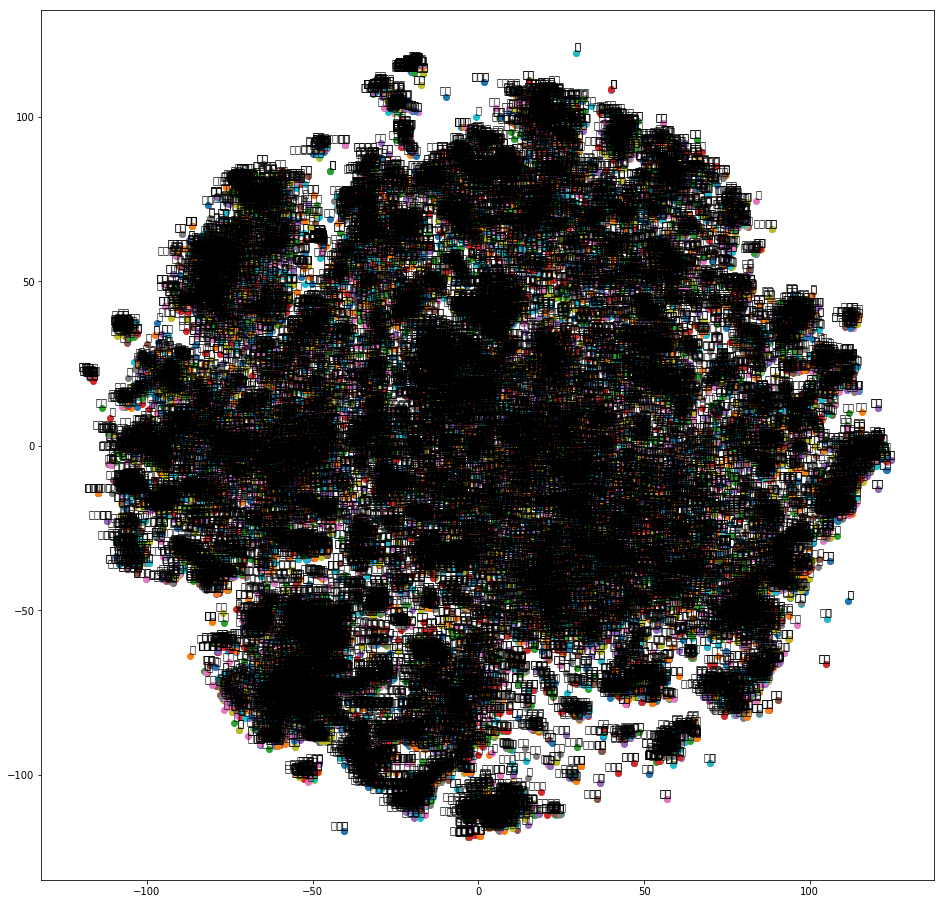

In [6]:
wiki_model = Word2Vec.load('wiki_min_count500.model')
tsne_plot(wiki_model)

### 第二张图，替换了SimHei.ttf文件，减少了语料库的量，使用预处理后的txt文件的前1w行训练处词向量，可视化效果是这样：

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


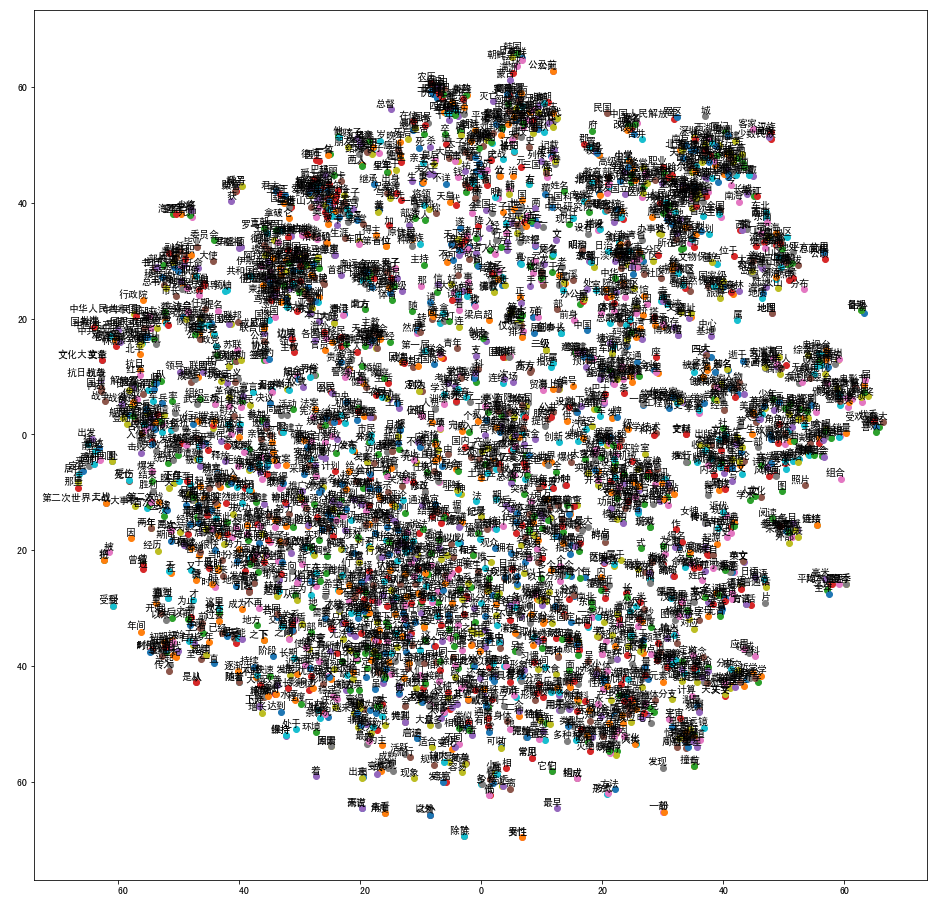

In [8]:
wiki_model = Word2Vec.load('wiki_min_count500.model')
tsne_plot(wiki_model)

### 第三张图，选用更少的语料，前1000行语料，效果是这样：^-^

/Users/admin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


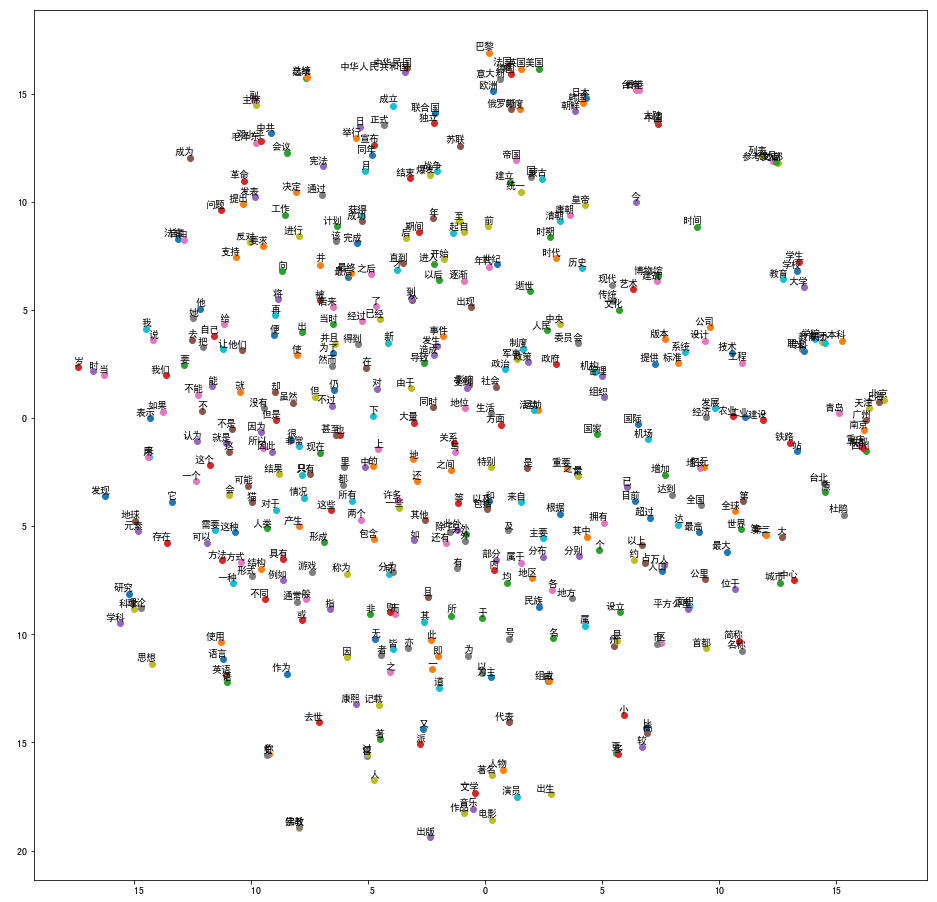

In [11]:
wiki_model = Word2Vec.load('wiki_min_count500.model')
tsne_plot(wiki_model)